# **Imports**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy import signal
import scipy.signal 
import pandas as pd
import numpy as np
import scipy.signal as sig
import soundfile as sf

**Read signal from file and plot it**



In [ ]:
def Read_originalsignal(filename):
    
    Original_Signal = np.loadtxt(filename)
    print(Original_Signal.size)
    # print(Original_Signal)

    plt.figure(figsize = (20,6), dpi = 100)
    plt.xticks(np.arange(0, len(Original_Signal)+1, 150))
    plt.plot(Original_Signal)
    plt.title('Original_Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

    return Original_Signal

4170


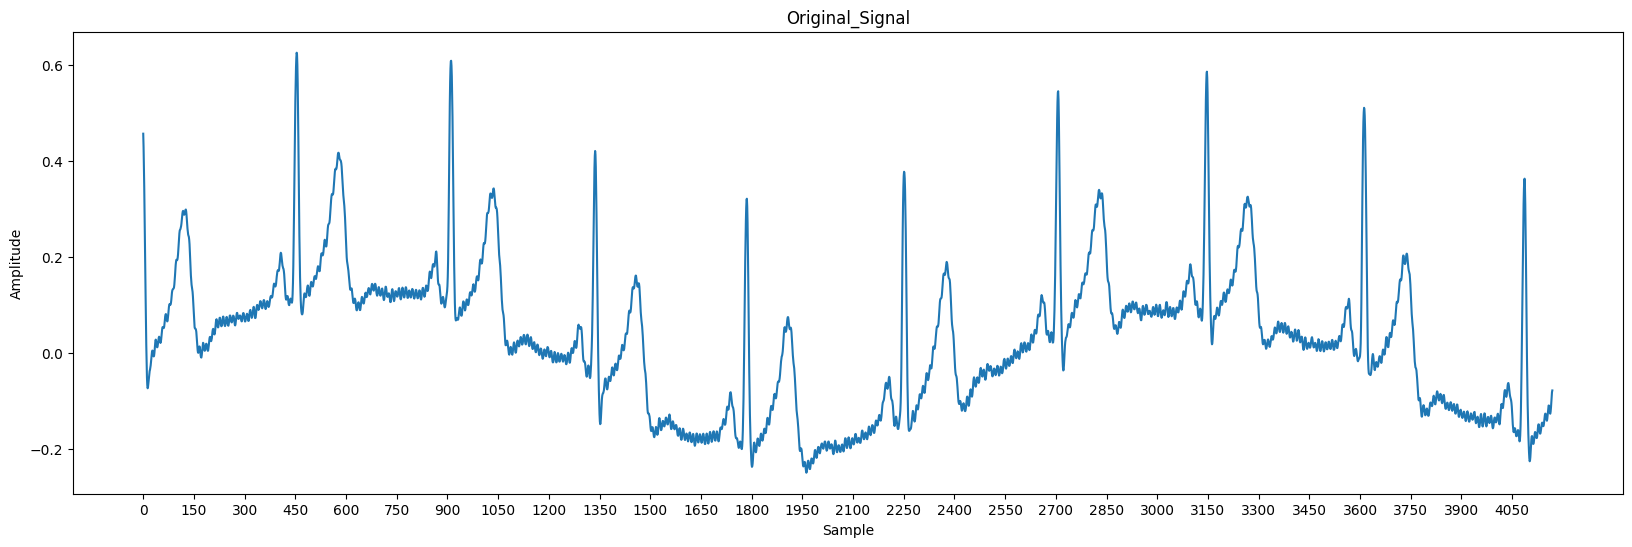

In [ ]:
Original_Signal = Read_originalsignal("Data1.txt")

**Derivative**


In [ ]:
def NPointDiff(input_array, N):
    # Load input audio file
    #x, fs = sf.read(input_audio)
    y = 0 
    # Define the N-point difference impulse response
    h = np.zeros(N)
    h[0:N//2] = 1/8 * ( -np.arange(N//2, 0, -1) )
    h[N//2+1:] = 1/8 * ( np.arange(1, N//2+1) )

    # Normalize the impulse response
    h = h / np.sum(np.abs(h))

    # Apply convolution with the impulse response
    y = sig.convolve(input_array, h, mode='same')
    
    plt.figure(figsize = (20,6), dpi = 100)
    plt.xticks(np.arange(0, len(y)+1, 150))
    plt.plot(y)
    plt.title('Derivative Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()
    return y
  
    # Write output audio file
    #sf.write(output_audio, y, fs)

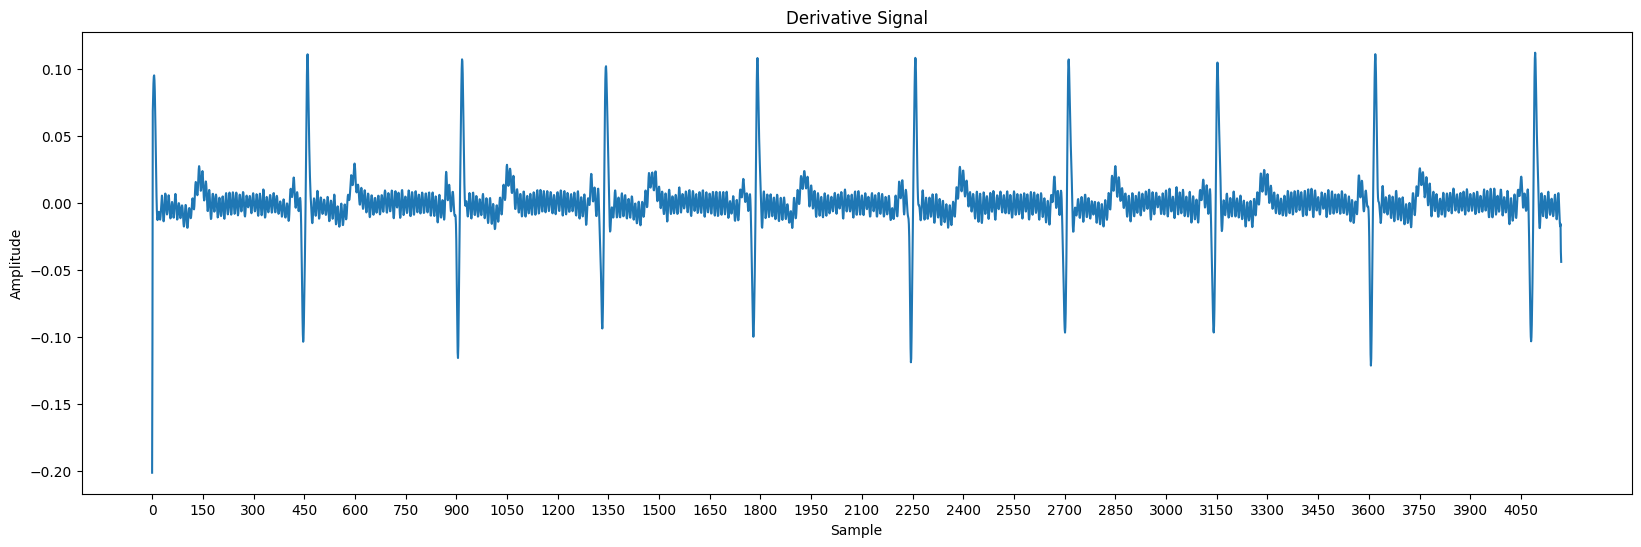

In [ ]:
output = NPointDiff(Original_Signal, 5)

**Square the derivative**


In [ ]:
def square_the_derivative(arr):
    squared_arr = np.square(arr)


    plt.figure(figsize = (20,6), dpi = 100)
    plt.xticks(np.arange(0, len(squared_arr)+1, 150))
    plt.plot(squared_arr)
    plt.title('Squared Derivative')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

    return squared_arr

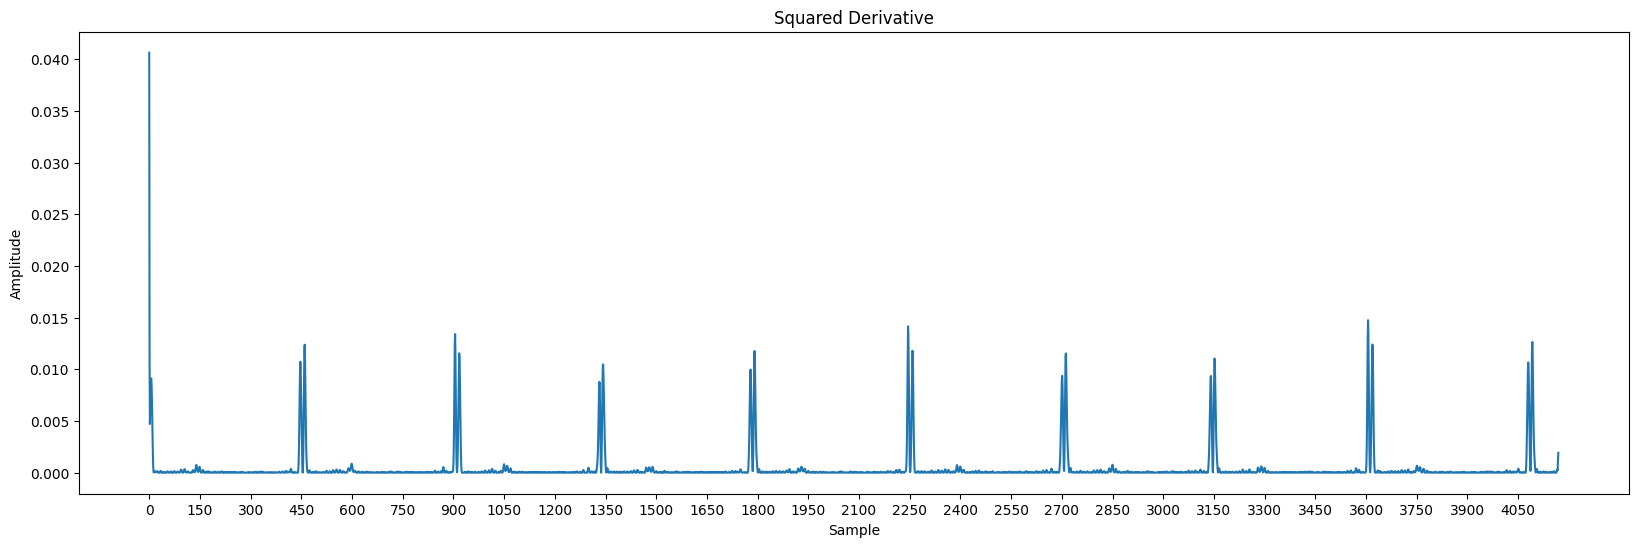

In [ ]:
squared_signal = square_the_derivative (output)

**Moving average window 31 samples**

In [ ]:
def smooth_signal_squared(signal_squared):
    window_size = 31  # Size of the moving average window
    smoothed_signal = np.zeros_like(signal_squared)  # Initialize the smoothed signal array
    
    # Iterate over the signal and apply the moving average window
    for n in range(len(signal_squared)):
        window_sum = 0
        for i in range(window_size):
            if n - i >= 0:
                window_sum += signal_squared[n - i]
        smoothed_signal[n] = window_sum / window_size
    #fs = 512  # Sampling rate in Hz
    #duration = 2000 / fs  # Duration of the first 2000 samples

    #time = np.arange(0, duration, 1/fs)  # Time axis for the plot
    sample_2000 = smoothed_signal[:2000]

    plt.figure(figsize=(20, 6), dpi=100)
    plt.plot(sample_2000)
    plt.title('Moving Average Plot')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()

    
    return smoothed_signal

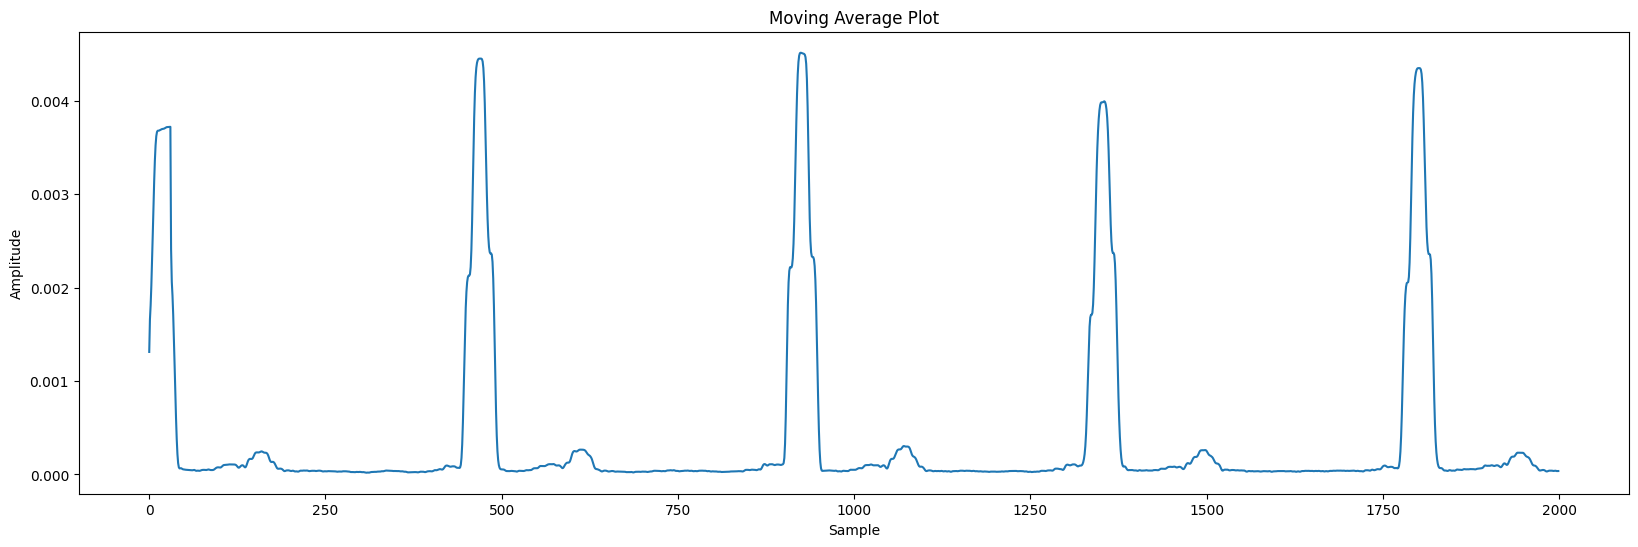

In [ ]:
smoothed = smooth_signal_squared(squared_signal)

**Autocorrelation we use** 

In [ ]:
def autocors(smoothed):
    result = np.correlate(smoothed, smoothed, mode='full')
    result =  result[result.size//2:]

    fs = 512  # Sampling rate in Hz
    duration = 2000 / fs  # Duration of the first 2000 samples

    lag = np.arange(0, len(result))  # Lag axis for the plot

    plt.figure(figsize=(10, 6), dpi=100)
    plt.plot(lag, result)
    plt.title('Autocorrelation Plot')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()
    return result


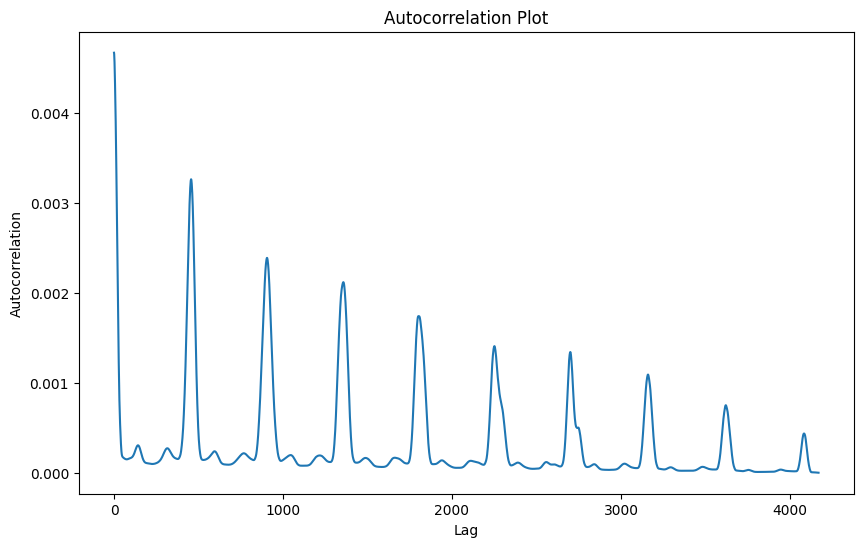

In [ ]:
auto_correlated_signal= autocors(smoothed)

**Correct heart Rate using find peaks**

In [ ]:
from scipy.signal import find_peaks

def get_heart_rate(auto_correlated_signal, fs):
    peaks, _ = find_peaks(auto_correlated_signal)
    heart_rate = 60 / (peaks[3] / fs)#peaks[x]: x for Data 1 is 3 because there are 2 minor peaks before the first maximum peak; x for Data 2 is 2 because there is a minor peak before the major peak
    print("The heart rate is:")
    print(heart_rate)
    print("*************\n")
    return heart_rate


In [ ]:
get_heart_rate(auto_correlated_signal,512)

The heart rate is:
51.63025210084034
*************



51.63025210084034

**Not working autocorrelation need deletion**

## Count peaks and peak width as two metrics to measure the disease

In [ ]:
def count_peaks(signal, threshold):
    peaks = 0
    above_threshold = False

    for i in range(1, len(signal) - 1):
        if signal[i] > signal[i - 1] and signal[i] > signal[i + 1]:
            above_threshold = signal[i] >= threshold
            peaks += above_threshold

    print("The number of peaks in the signal is: ")
    print(peaks)
    print("############# \n")
    return peaks

In [ ]:
peaks_num =  count_peaks(auto_correlated_signal, 0.0005)
print(peaks_num)

The number of peaks in the signal is: 
9
############# 

9


In [ ]:
def compute_autocorrelation_peak_width(autocorr):
    peaks, _ = find_peaks(autocorr)
    widths = np.diff(peaks) / 512
    mean_widths = np.mean(widths)
    print("The mean width between peaks is:")
    print(mean_widths)
    
    return mean_widths

**Full ECG analysis using Autocorrelation**

In [ ]:
def ECG(filename):
  Original_Signal = Read_originalsignal(filename)
  derivative = NPointDiff(Original_Signal, 5)
  squared_signal = square_the_derivative (derivative)
  smoothed = smooth_signal_squared(squared_signal)
  auto_correlated_signal= autocors(smoothed)
  #heart_rate(auto_correlated_signal)
  get_heart_rate(auto_correlated_signal,512)
  #Num_peaks(auto_correlated_signal)
  count_peaks(auto_correlated_signal, 0.0005)
  compute_autocorrelation_peak_width(auto_correlated_signal)
  #compute_autocorrelation(Original_Signal)



4170


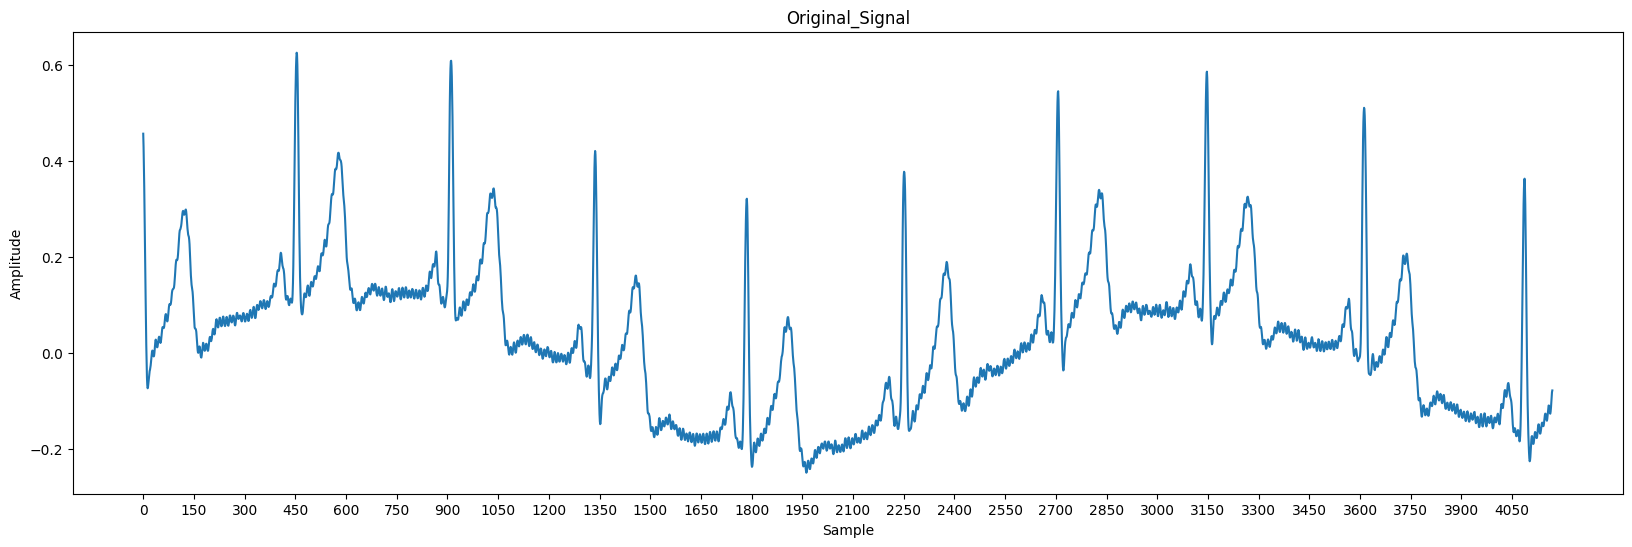

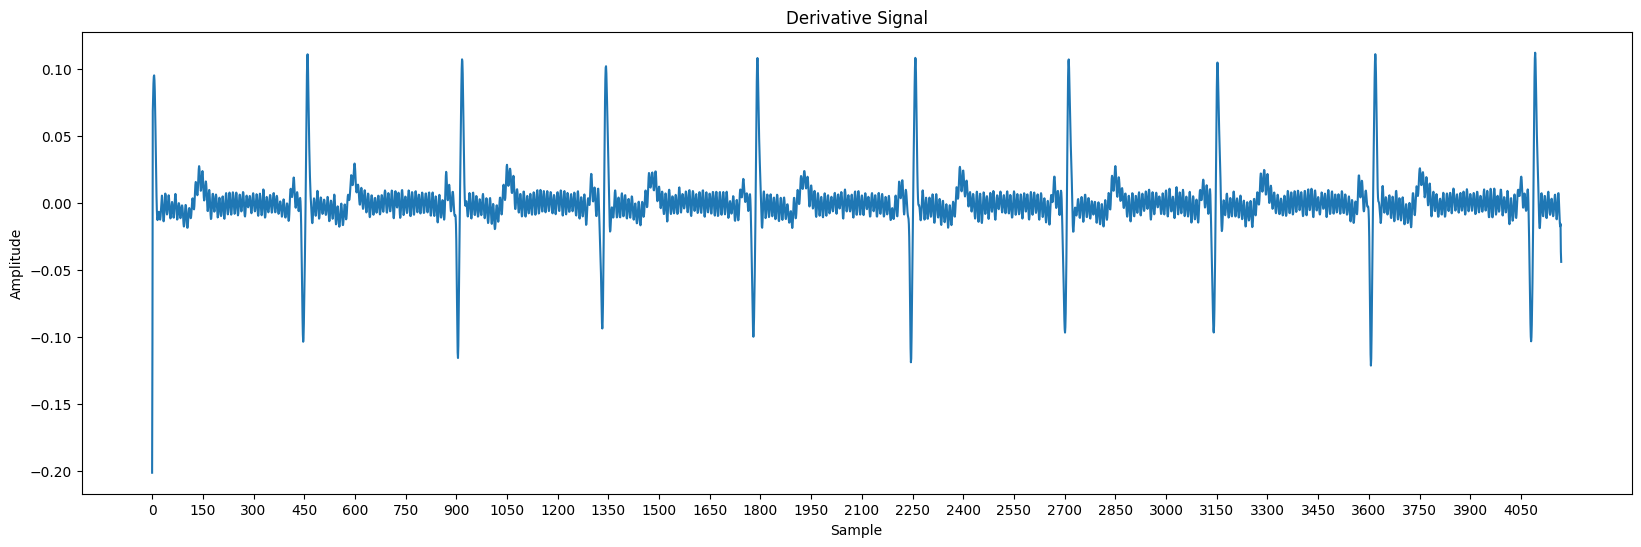

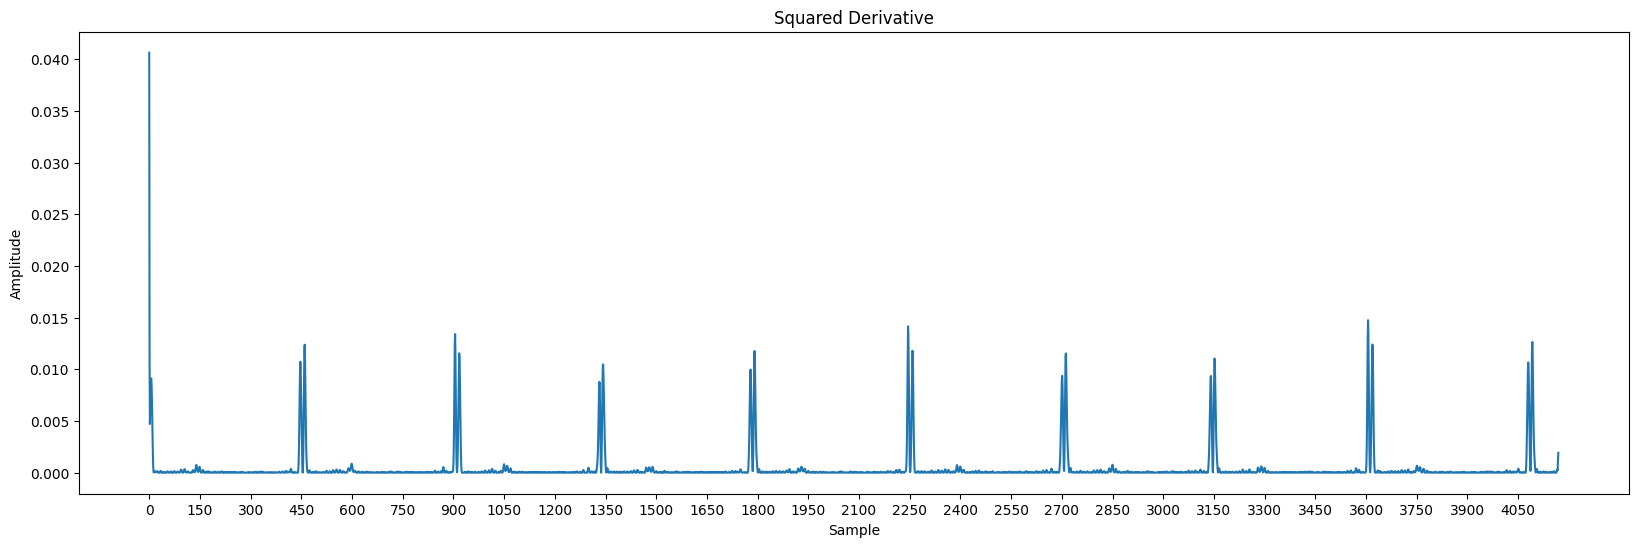

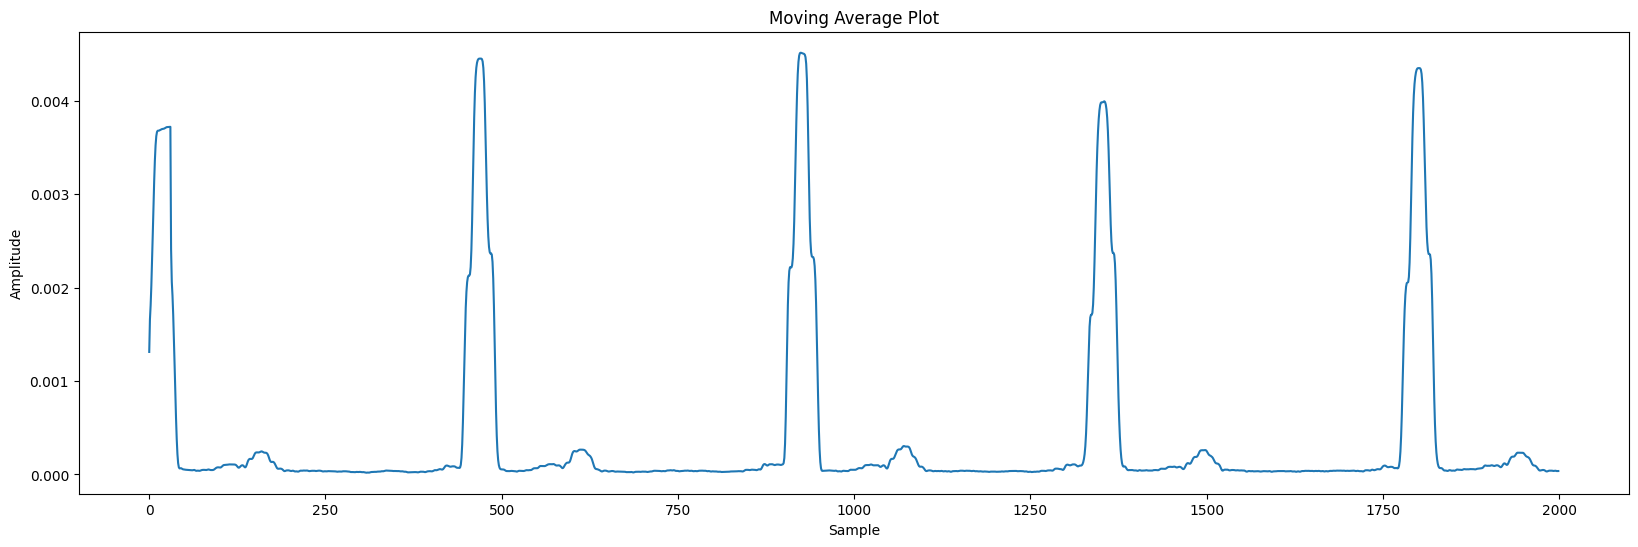

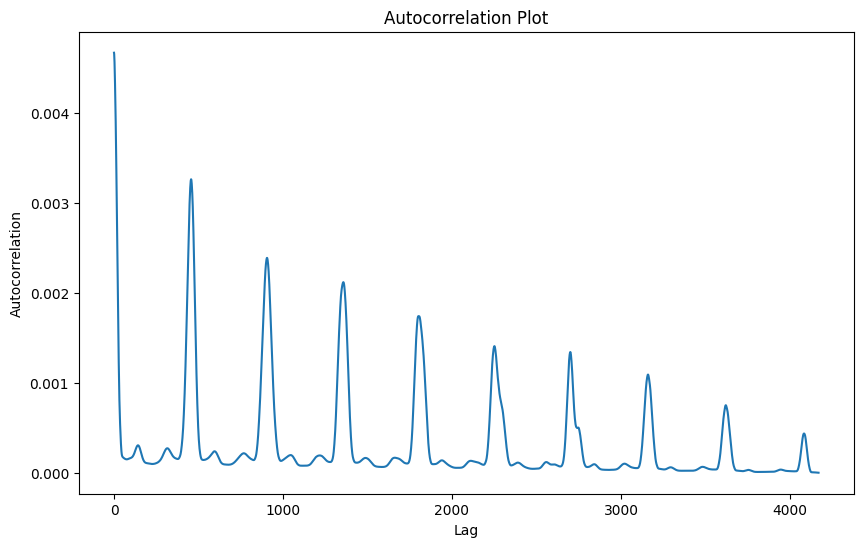

The heart rate is:
51.63025210084034
*************

The number of peaks in the signal is: 
9
############# 

The mean width between peaks is:
0.22960707720588236


In [ ]:
ECG("Data1.txt")

## **Part2: Detecting Atrial Fibrillation**

5000


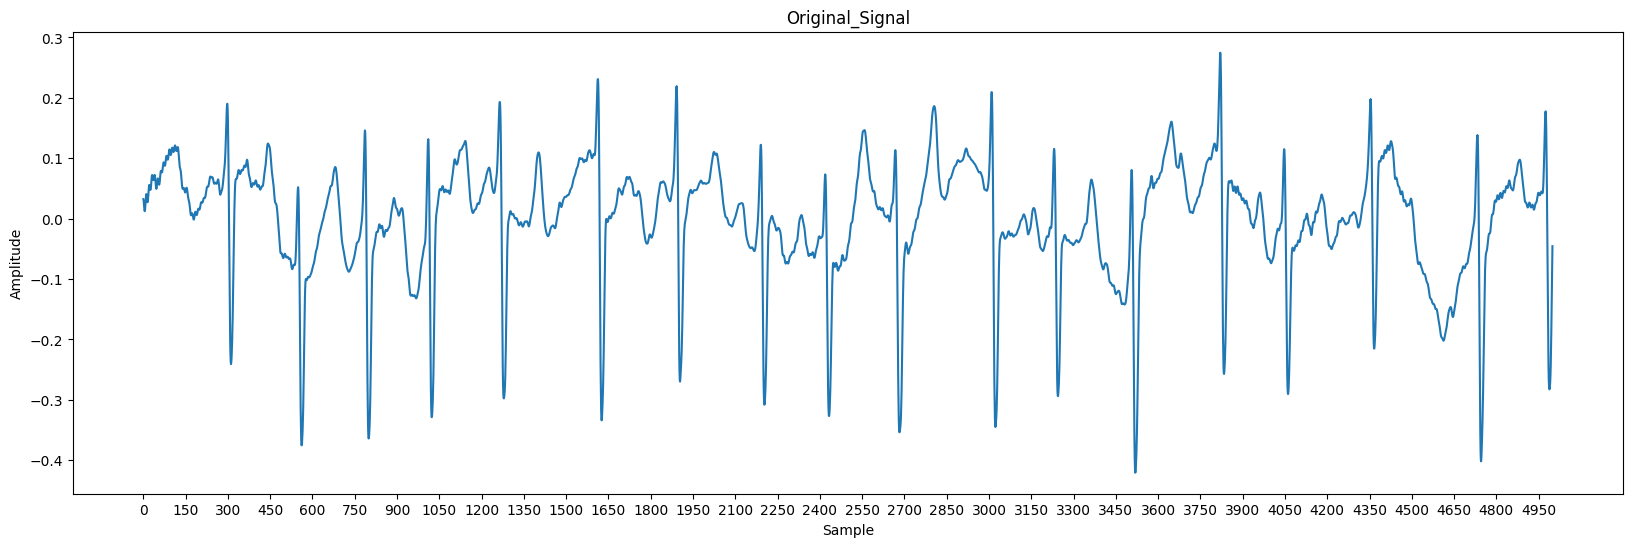

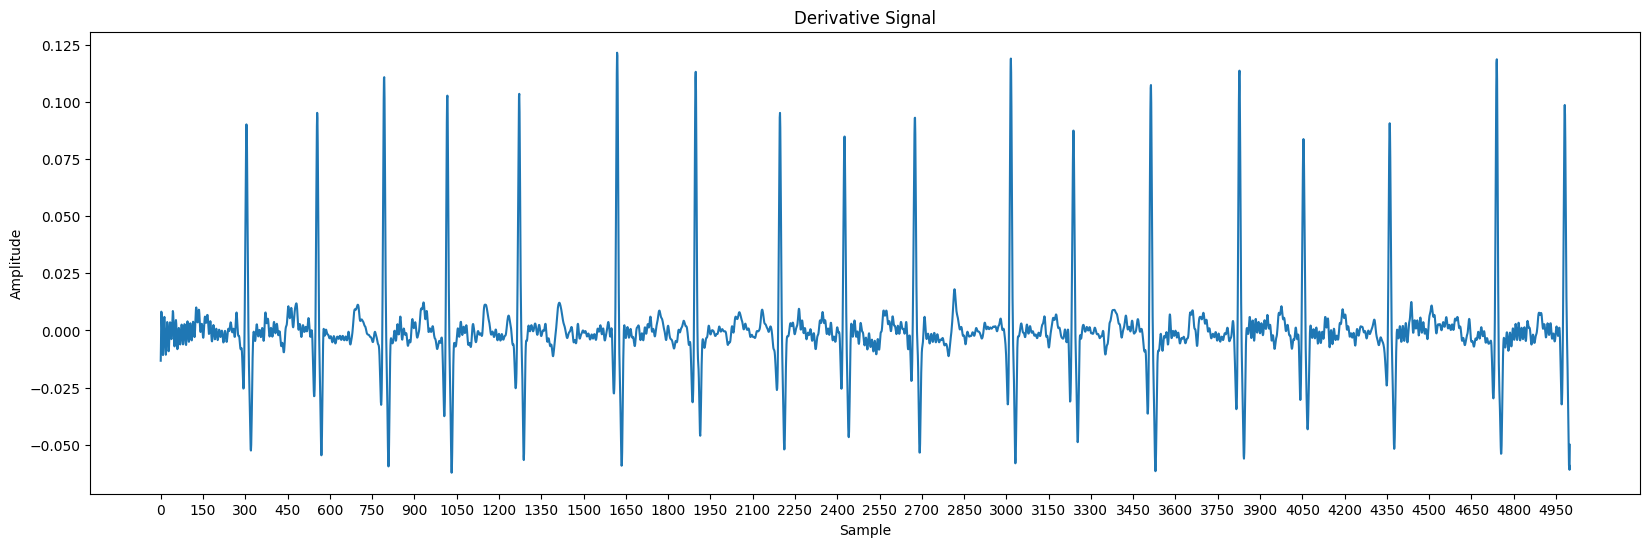

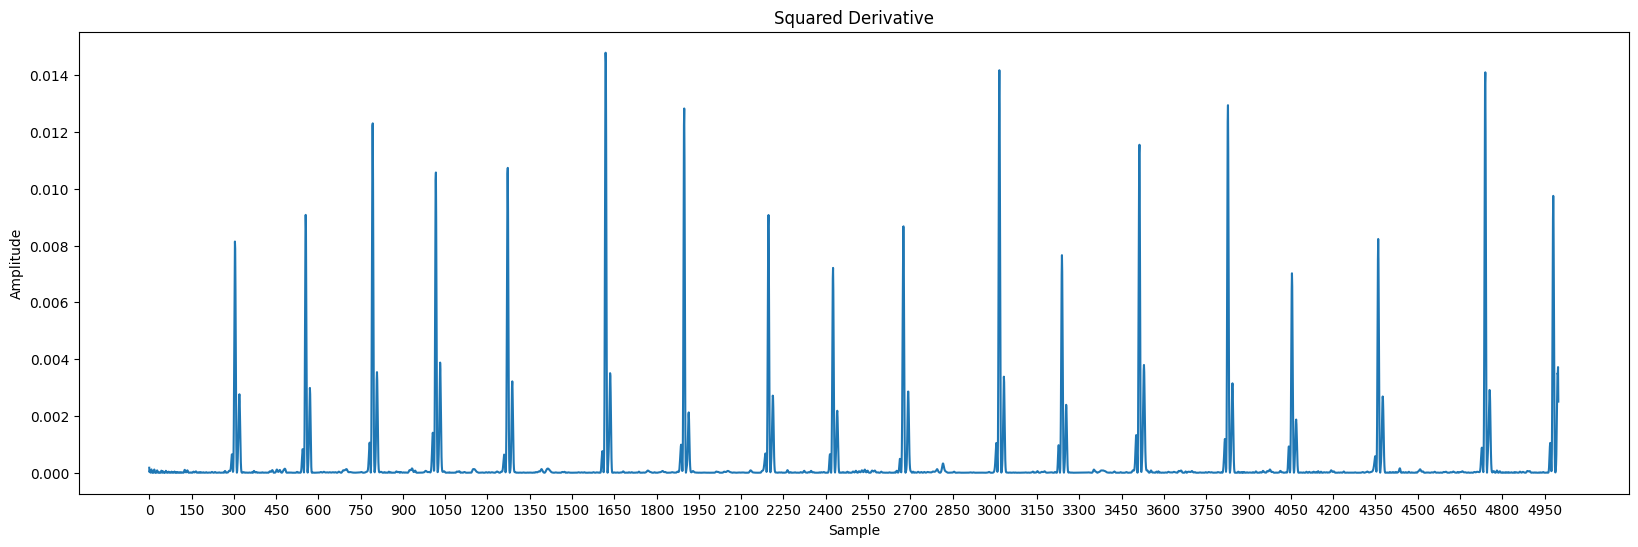

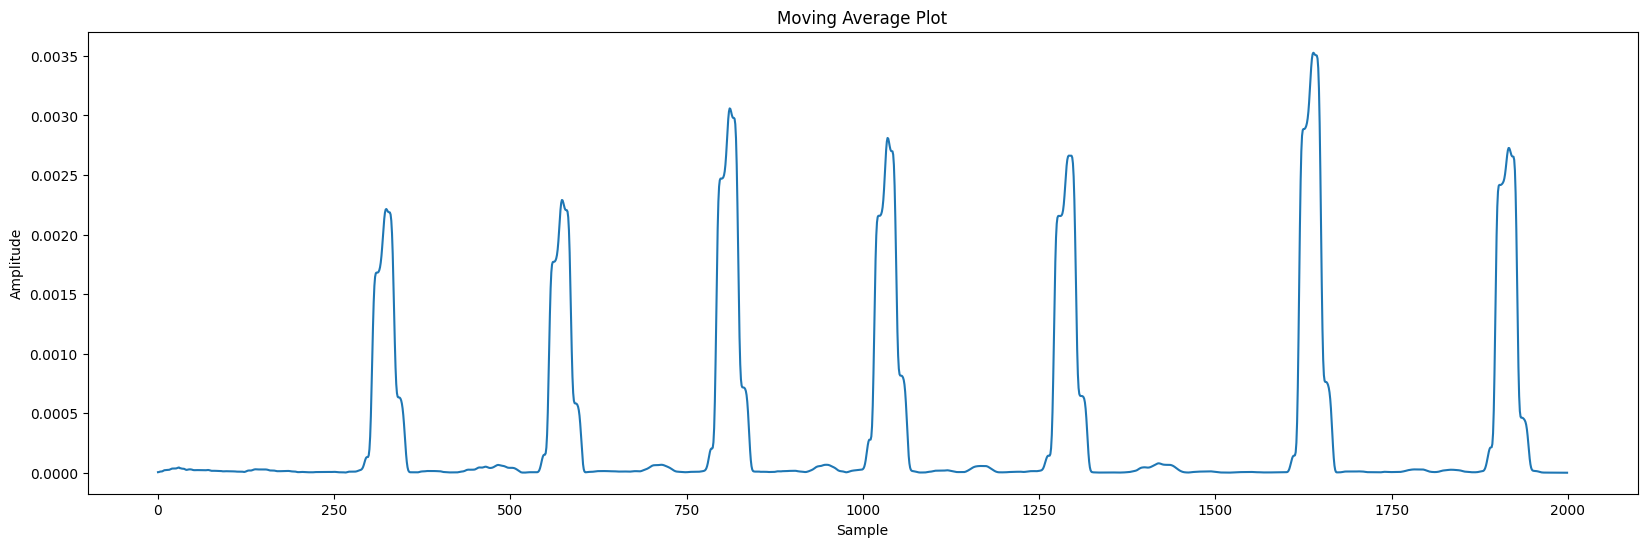

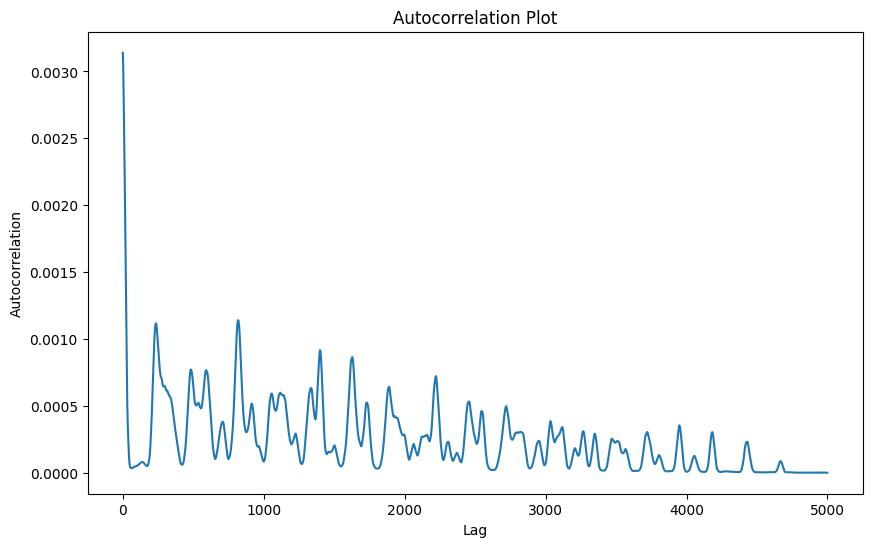

The heart rate is:
103.78378378378379
*************

The number of peaks in the signal is: 
18
############# 

The mean width between peaks is:
0.15445696721311475


In [ ]:
ECG("Data2.txt")

## **All our failed tries**

**Autocorrelation**(against time)

In [ ]:
def Autocorrelation(smoothed):
    result = np.correlate(smoothed, smoothed, mode='full')
    result =  result[result.size//2:]

    fs = 512  # Sampling rate in Hz
    duration = 2000 / fs  # Duration of the first 2000 samples

    time = np.arange(0, duration, 1/fs)  # Time axis for the plot

    plt.figure(figsize=(20, 6), dpi=100)
    plt.plot(time, result[:len(time)])
    plt.title('Moving Average Plot')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


**Average heart rate not correct using argmax**

In [ ]:
def heart_rate(auto_correlated_signal):
  fs=512
  average_heart_rate = 60/(np.argmax(auto_correlated_signal[30:])/fs)
  af_measure = np.max(auto_correlated_signal)
  #print("**************************",af_measure)

  #print(np.argmax(auto_correlated_signal[1000:]))
  print(average_heart_rate)
  
  return average_heart_rate


In [ ]:
def Num_peaks(signal):
  peaks, _ = find_peaks(auto_correlated_signal)
  print("The number of peaks in the signal is: ")
  print(peaks.size)
  print("############# \n")
  return peaks.size

In [ ]:

def compute_autocorrelation(Original_Signal):
    Original_Signal = np.asarray(Original_Signal)
    # Normalize the signal to have zero mean
    normalized_signal = Original_Signal - np.mean(Original_Signal)

    # Compute the autocorrelation using numpy's correlate function
    autocorr = np.correlate(normalized_signal, normalized_signal, mode='full')

    # Get the autocorrelation coefficient at lag 1
    autocorr_coef = auto_correlated_signal[len(Original_Signal) - 1] / (np.std(Original_Signal) ** 2 * len(Original_Signal))

    return autocorr_coef